In [2]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
churn_data = pl.read_csv("C:/Users/rober/OneDrive/Escriptori/DataSets/xgboost-calibration/XGBoost-and-Model-Calibration/data/Churn_Modelling.csv")

In [4]:
churn_data.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
i64,i64,str,i64,str,str,f64,i64,f64,i64,i64,i64,f64,i64
1,15634602,"""Hargrave""",619,"""France""","""Female""",42.0,2,0.0,1,1,1,101348.88,1
2,15647311,"""Hill""",608,"""Spain""","""Female""",41.0,1,83807.86,1,0,1,112542.58,0
3,15619304,"""Onio""",502,"""France""","""Female""",42.0,8,159660.8,3,1,0,113931.57,1
4,15701354,"""Boni""",699,"""France""","""Female""",39.0,1,0.0,2,0,0,93826.63,0
5,15737888,"""Mitchell""",850,"""Spain""","""Female""",43.0,2,125510.82,1,null,1,79084.1,0


In [5]:
churn_data.tail()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
i64,i64,str,i64,str,str,f64,i64,f64,i64,i64,i64,f64,i64
9998,15584532,"""Liu""",709,"""France""","""Female""",36.0,7,0.0,1,0,1,42085.58,1
9999,15682355,"""Sabbatini""",772,"""Germany""","""Male""",42.0,3,75075.31,2,1,0,92888.52,1
9999,15682355,"""Sabbatini""",772,"""Germany""","""Male""",42.0,3,75075.31,2,1,0,92888.52,1
10000,15628319,"""Walker""",792,"""France""","""Female""",28.0,4,130142.79,1,1,0,38190.78,0
10000,15628319,"""Walker""",792,"""France""","""Female""",28.0,4,130142.79,1,1,0,38190.78,0


In [9]:
churn_data.glimpse()

Rows: 10002
Columns: 14
$ RowNumber       <i64> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
$ CustomerId      <i64> 15634602, 15647311, 15619304, 15701354, 15737888, 15574012, 15592531, 15656148, 15792365, 15592389
$ Surname         <str> Hargrave, Hill, Onio, Boni, Mitchell, Chu, Bartlett, Obinna, He, H?
$ CreditScore     <i64> 619, 608, 502, 699, 850, 645, 822, 376, 501, 684
$ Geography       <str> France, Spain, France, France, Spain, Spain, None, Germany, France, France
$ Gender          <str> Female, Female, Female, Female, Female, Male, Male, Female, Male, Male
$ Age             <f64> 42.0, 41.0, 42.0, 39.0, 43.0, 44.0, 50.0, 29.0, 44.0, None
$ Tenure          <i64> 2, 1, 8, 1, 2, 8, 7, 4, 4, 2
$ Balance         <f64> 0.0, 83807.86, 159660.8, 0.0, 125510.82, 113755.78, 0.0, 115046.74, 142051.07, 134603.88
$ NumOfProducts   <i64> 1, 1, 3, 2, 1, 2, 2, 4, 2, 1
$ HasCrCard       <i64> 1, 0, 1, 0, None, 1, 1, 1, 0, 1
$ IsActiveMember  <i64> 1, 1, 0, 0, 1, 0, 1, 0, None, 1
$ EstimatedSalary <f64> 10

In [6]:
churn_data = churn_data.unique(subset=["CustomerId"])

In [7]:
churn_data.glimpse()

Rows: 10000
Columns: 14
$ RowNumber       <i64> 7717, 6482, 5523, 2417, 4632, 5233, 3610, 9780, 9432, 8493
$ CustomerId      <i64> 15687540, 15664752, 15686696, 15707120, 15706116, 15684960, 15657868, 15712568, 15598948, 15804104
$ Surname         <str> Obiuto, Jack, Brown, Cocci, McKay, Yewen, Serra, Angelo, DeRose, Romani
$ CreditScore     <i64> 684, 606, 817, 850, 659, 559, 850, 515, 523, 494
$ Geography       <str> France, Germany, France, France, Germany, France, Germany, Spain, Spain, France
$ Gender          <str> Male, Male, Female, Male, Female, Female, Male, Male, Female, Male
$ Age             <f64> 32.0, 39.0, 37.0, 46.0, 30.0, 46.0, 40.0, 40.0, 24.0, 28.0
$ Tenure          <i64> 9, 8, 6, 9, 8, 5, 6, 10, 5, 9
$ Balance         <f64> 100249.41, 136000.45, 81070.34, 117640.39, 154159.51, 0.0, 94607.08, 121355.99, 172231.93, 114731.76
$ NumOfProducts   <i64> 2, 2, 2, 1, 1, 1, 1, 1, 1, 2
$ HasCrCard       <i64> 0, 1, 1, 1, 1, 1, 1, 1, 0, 0
$ IsActiveMember  <i64> 1, 0, 0, 0, 0,

In [8]:
churn_data.describe()

describe,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
str,f64,f64,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",10000.0,10000.0,"""10000""",10000.0,"""10000""","""10000""",10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
"""null_count""",0.0,0.0,"""0""",0.0,"""1""","""0""",1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
"""mean""",5000.5,1.5691e7,null,650.5288,null,null,38.923095,5.0128,76485.889288,1.5302,0.705471,0.515052,100090.239881,0.2037
"""std""",2886.89568,71936.186123,null,96.653299,null,null,10.487635,2.892174,62397.405202,0.581654,0.455854,0.499798,57510.492818,0.402769
"""min""",1.0,1.5565701e7,"""Abazu""",350.0,"""France""","""Female""",18.0,0.0,0.0,1.0,0.0,0.0,11.58,0.0
"""25%""",2501.0,1.562853e7,null,584.0,null,null,32.0,3.0,0.0,1.0,0.0,0.0,51011.29,0.0
"""50%""",5001.0,1.5690743e7,null,652.0,null,null,37.0,5.0,97208.46,1.0,1.0,1.0,100200.4,0.0
"""75%""",7501.0,1.5753248e7,null,718.0,null,null,44.0,7.0,127649.64,2.0,1.0,1.0,149399.7,0.0
"""max""",10000.0,1.581569e7,"""Zuyeva""",850.0,"""Spain""","""Male""",92.0,10.0,250898.09,4.0,1.0,1.0,199992.48,1.0


In [9]:
churn_data = churn_data.drop_nulls()

In [10]:
churn_data.shape

(9996, 14)

In [11]:
churn_data.columns

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [12]:
numerical_data = churn_data.select([
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited'])

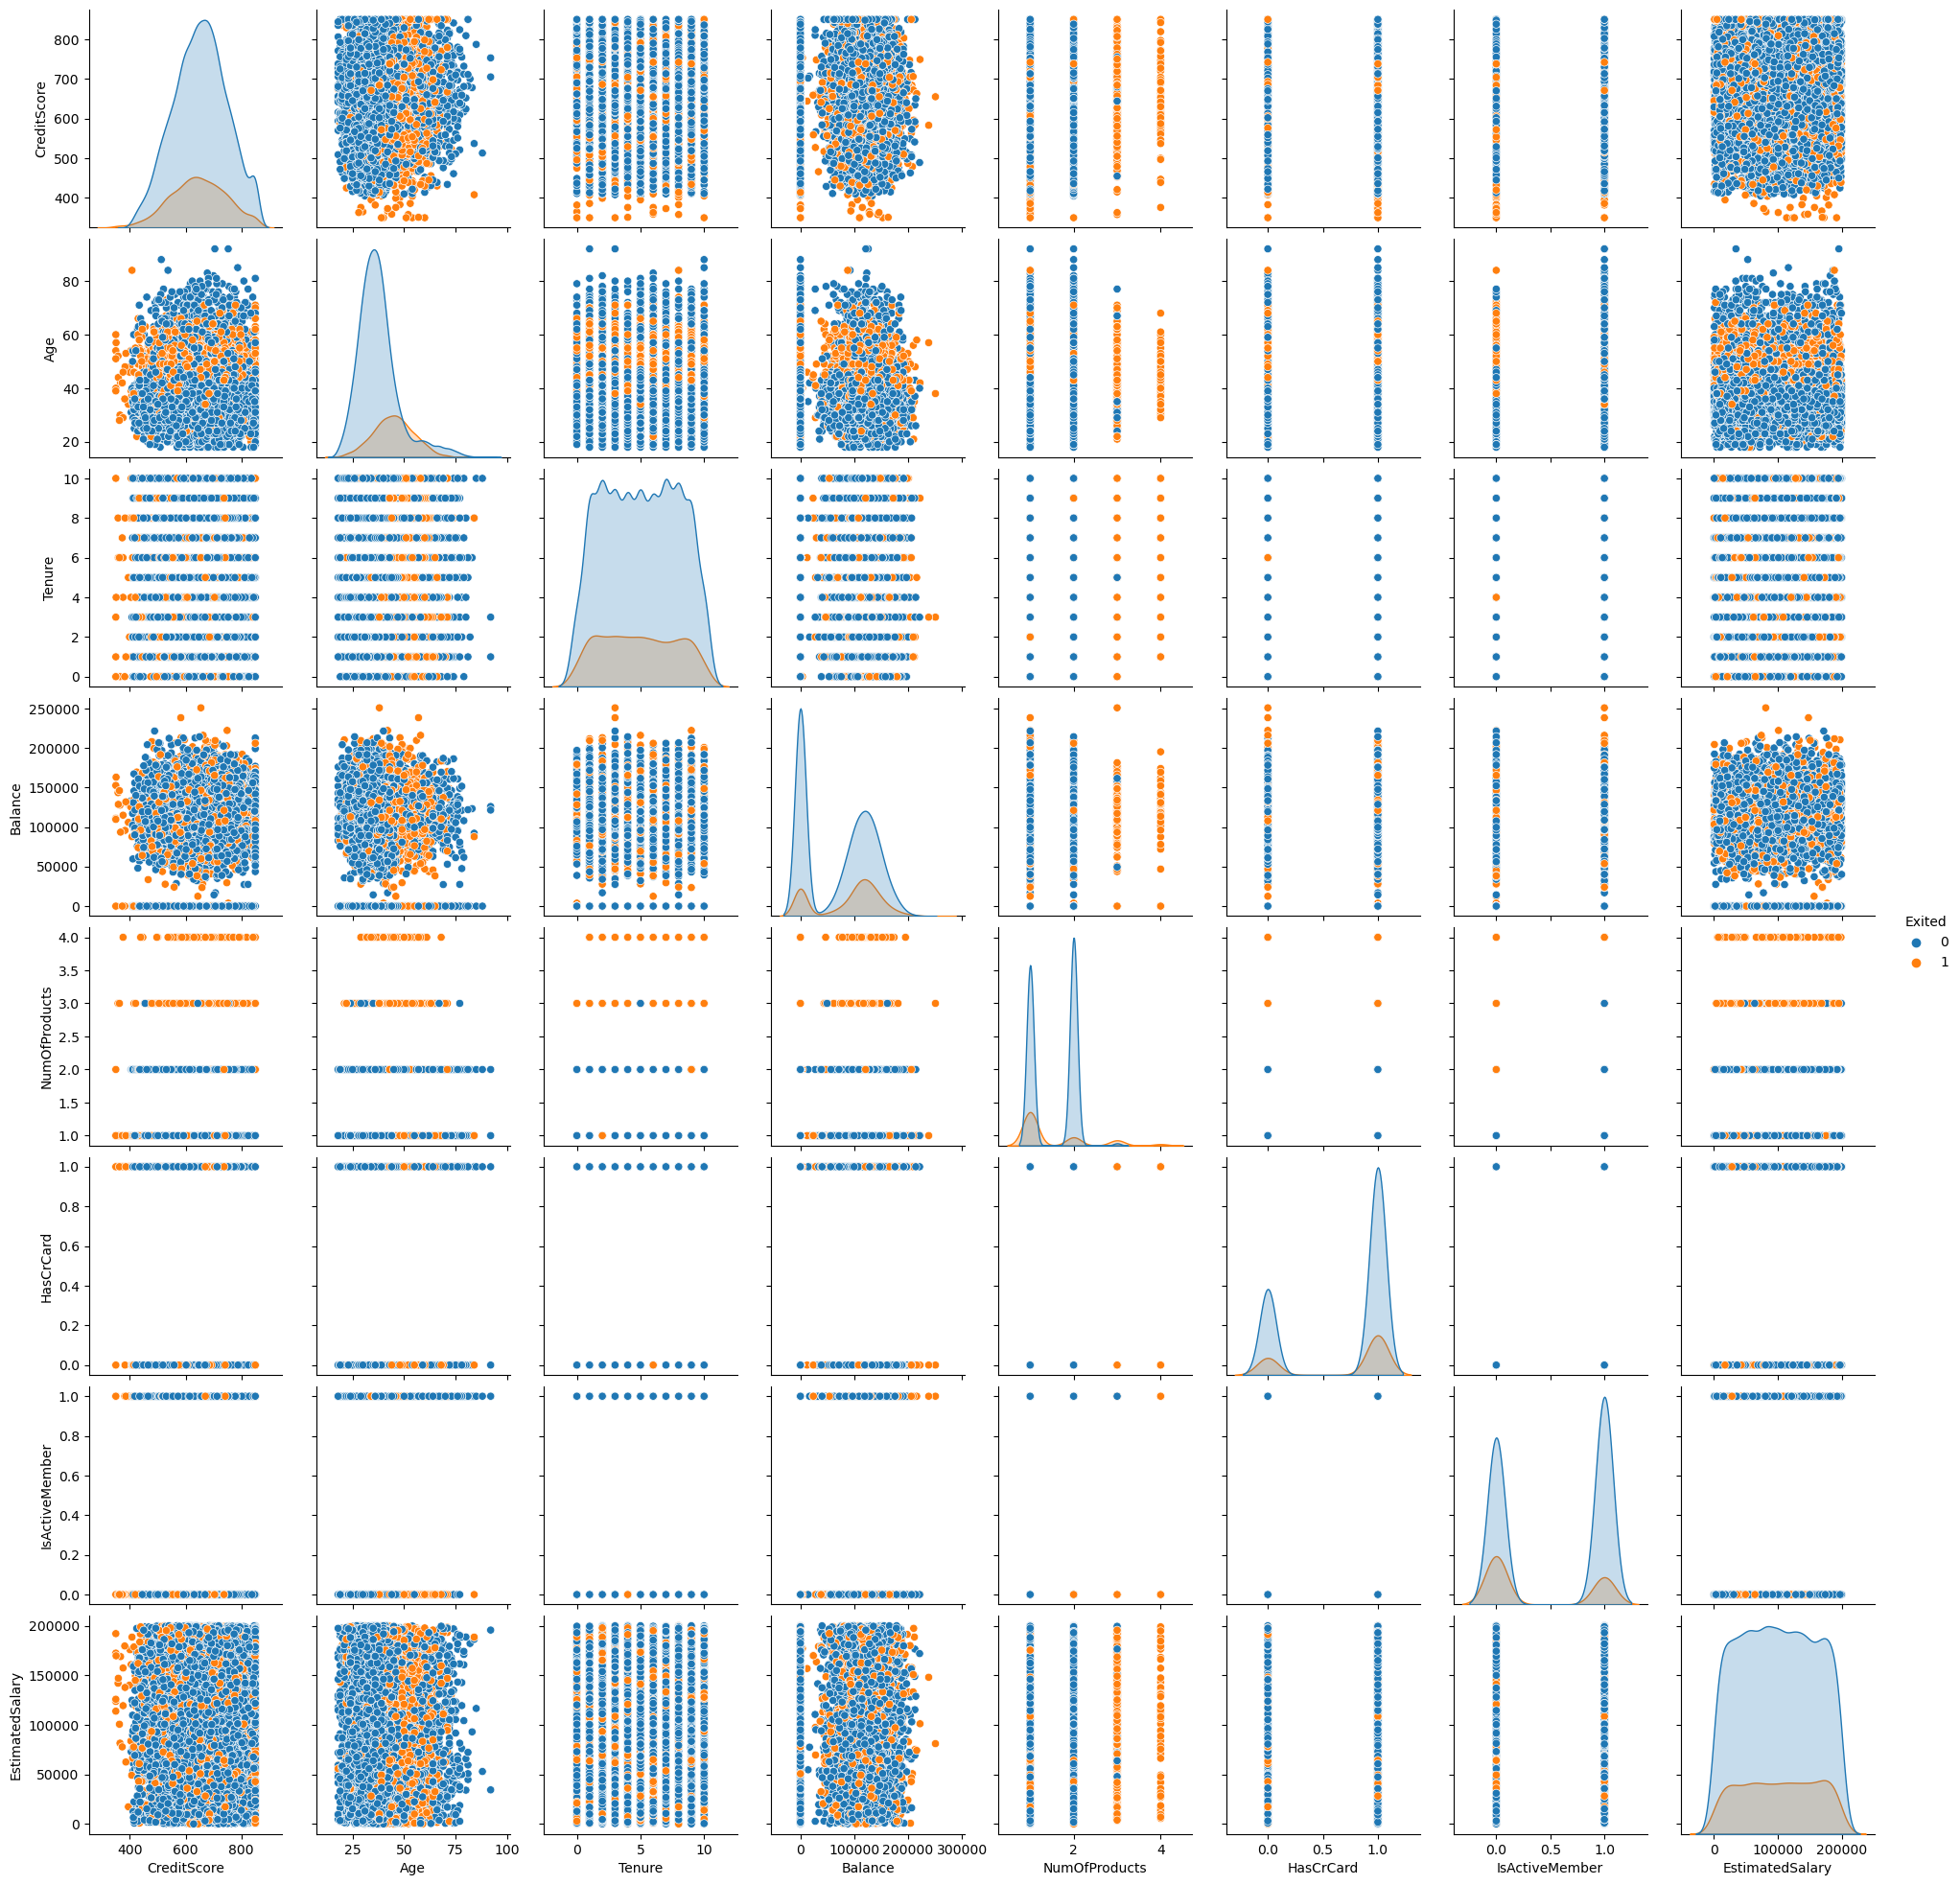

In [13]:
sns.pairplot(numerical_data.to_pandas(), hue="Exited")

In [14]:
numerical_data.drop(columns=['Geography',
 'Gender',]).corr()

CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,-0.004118,0.000918,0.006459,0.012447,-0.005972,0.025413,-0.001082,-0.026975
-0.004118,1.0,-0.010133,0.028469,-0.030885,-0.011669,0.085422,-0.007049,0.285413
0.000918,-0.010133,1.0,-0.011958,0.01323,0.022626,-0.028202,0.007789,-0.014092
0.006459,0.028469,-0.011958,1.0,-0.304116,-0.014733,-0.010238,0.012731,0.118641
0.012447,-0.030885,0.01323,-0.304116,1.0,0.003375,0.009635,0.014292,-0.04784
-0.005972,-0.011669,0.022626,-0.014733,0.003375,1.0,-0.011908,-0.009848,-0.00712
0.025413,0.085422,-0.028202,-0.010238,0.009635,-0.011908,1.0,-0.011147,-0.155969
-0.001082,-0.007049,0.007789,0.012731,0.014292,-0.009848,-0.011147,1.0,0.011955
-0.026975,0.285413,-0.014092,0.118641,-0.04784,-0.00712,-0.155969,0.011955,1.0


<Axes: >

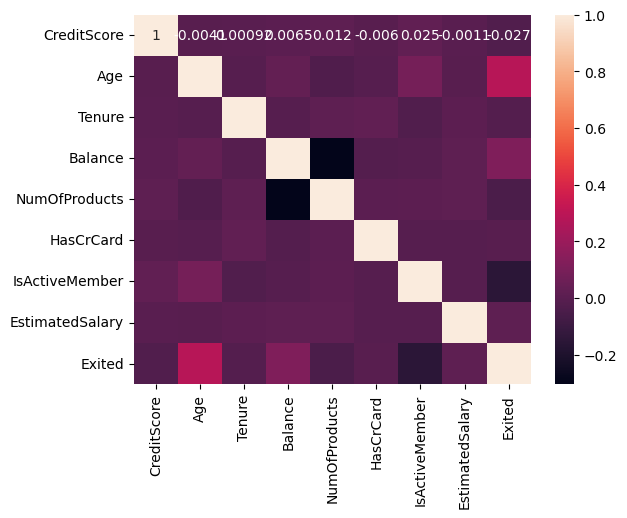

In [18]:
sns.heatmap(numerical_data.drop(columns=['Geography',
 'Gender']).to_pandas().corr(), annot=True)

In [25]:
heat = numerical_data.drop(columns=['Geography',
 'Gender']).to_pandas().corr()
heat

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.004118,0.000918,0.006459,0.012447,-0.005972,0.025413,-0.001082,-0.026975
Age,-0.004118,1.000000,-0.010133,0.028469,-0.030885,-0.011669,0.085422,-0.007049,0.285413
Tenure,0.000918,-0.010133,1.000000,-0.011958,0.013230,0.022626,-0.028202,0.007789,-0.014092
Balance,0.006459,0.028469,-0.011958,1.000000,-0.304116,-0.014733,-0.010238,0.012731,0.118641
NumOfProducts,0.012447,-0.030885,0.013230,-0.304116,1.000000,0.003375,0.009635,0.014292,-0.047840
HasCrCard,-0.005972,-0.011669,0.022626,-0.014733,0.003375,1.000000,-0.011908,-0.009848,-0.007120
IsActiveMember,0.025413,0.085422,-0.028202,-0.010238,0.009635,-0.011908,1.000000,-0.011147,-0.155969
EstimatedSalary,-0.001082,-0.007049,0.007789,0.012731,0.014292,-0.009848,-0.011147,1.000000,0.011955
Exited,-0.026975,0.285413,-0.014092,0.118641,-0.047840,-0.007120,-0.155969,0.011955,1.000000


<Axes: >

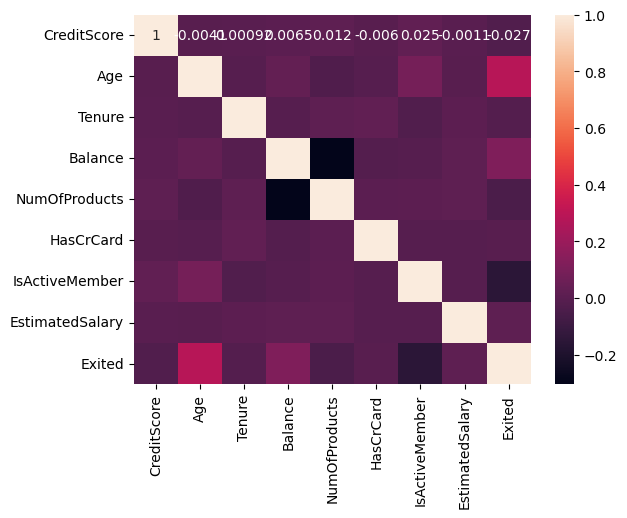

In [24]:
sns.heatmap(heat, annot=True)